---
<p><font  color=“9966FF”>***COMMENTS:***.<br>
<b><p> Overall: Good. <p>
<p>For Part 1: Student done well and could demonstate students understanding of Visualization and interpretation on plots using Matplotlib. 
    
<p> For Part 2:  Good Visualization and interpretation on plots using Matplotlib and Seaborn. However, need to practice how to form hypotheses and justify them with solid statistical testing.</p></b></font></p>

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
# 2 issues to note
# first: high school education outcomes - this shuld tally with SAT scores by state data
# second: drug abuse in the community - drug use data by age
# perform Exploratory Data Analysis - ask questions on the collected data, what can the data tell u
# questions for the raw dataset - missing values?, data type correct?, anomalies?, any noteworthy relationships between data variables?, effective visualisations
# any hypothesis can de derived from cleaned datat?, what to do with null values and anomalies? any trends or bulk shifts? can we account for trends and shifts?



In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
datafile = 'sat_scores.csv'
csv_rows = []
with open(datafile, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        csv_rows.append(row)
f.close()
print('file closed')
header = csv_rows[0]
data = csv_rows[1:]
dataset_SAT = {category:[row[header.index(category)] for row in data] for category in header}
print(dataset_SAT)

file closed
{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '

<font color='red'> Correct

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
data_SAT_v0 = pd.DataFrame(dataset_SAT)
data_SAT = pd.read_csv(datafile)
print(data_SAT_v0.dtypes)
print('-'*50)
print(data_SAT.dtypes)

State     object
Rate      object
Verbal    object
Math      object
dtype: object
--------------------------------------------------
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

<font color='red'> Correct

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [29]:
data_SAT.head(10)
#data describes rate, verabl and the math aspects of SAT scores across states
# Is 'Rate' passing rate? in percentage?
# Are the 'Verbal' and 'Math" numbers mean scores?
data_SAT.shape

data_SAT.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<font color='red'> Correct

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
data_dict = {column:{'variable type':int, 'description':'percentages of ', 'shape':[52, 1]} for column in header}
data_dict['State']['variable type'] = object
data_dict['State']['description'] = 'abbrevations of states in the US'
data_dict['Verbal']['description'] = 'mean(average) score for verbal aspect of the SAT exam'
data_dict['Math']['description'] = 'mean(avergae) score for math aspect of the SAT exam'
data_dict['overall shape'] = [52, 4]
data_dict

{'State': {'variable type': object,
  'description': 'abbrevations of states in the US',
  'shape': [52, 1]},
 'Rate': {'variable type': int,
  'description': 'percentages of ',
  'shape': [52, 1]},
 'Verbal': {'variable type': int,
  'description': 'mean(average) score for verbal aspect of the SAT exam',
  'shape': [52, 1]},
 'Math': {'variable type': int,
  'description': 'mean(avergae) score for math aspect of the SAT exam',
  'shape': [52, 1]},
 'overall shape': [52, 4]}

<font color='red'> Correct

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

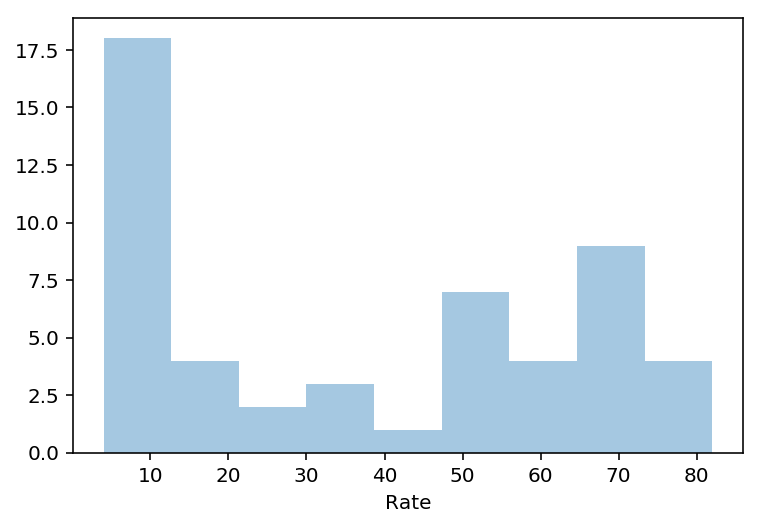

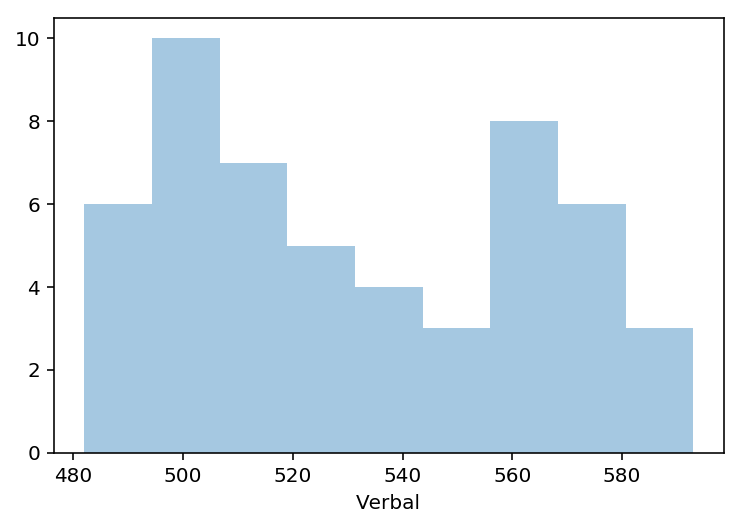

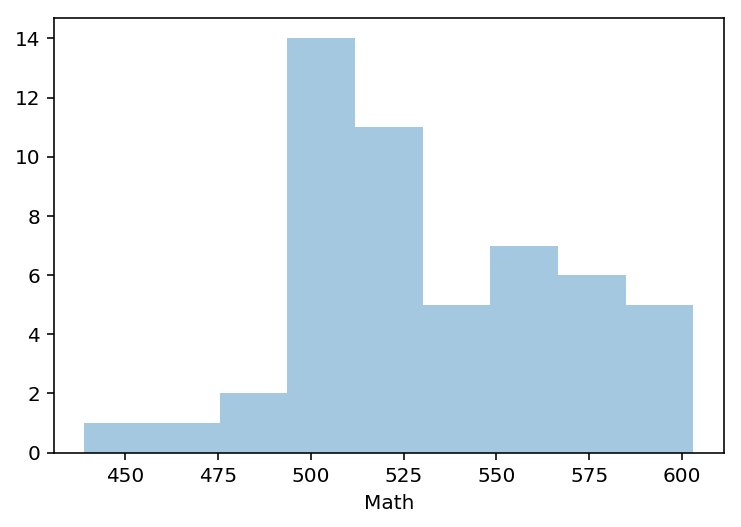

In [7]:
sns.distplot(data_SAT['Rate'], bins=9, kde=False, label='')
plt.show()
sns.distplot(data_SAT['Verbal'], bins=9, kde=False, label='')
plt.show()
sns.distplot(data_SAT['Math'], bins=9, kde=False, label='')
plt.show()

<font color='red'> You can try by changing binsize of the histogram(bin size you applied is small). So that you can get goo data distribution.

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


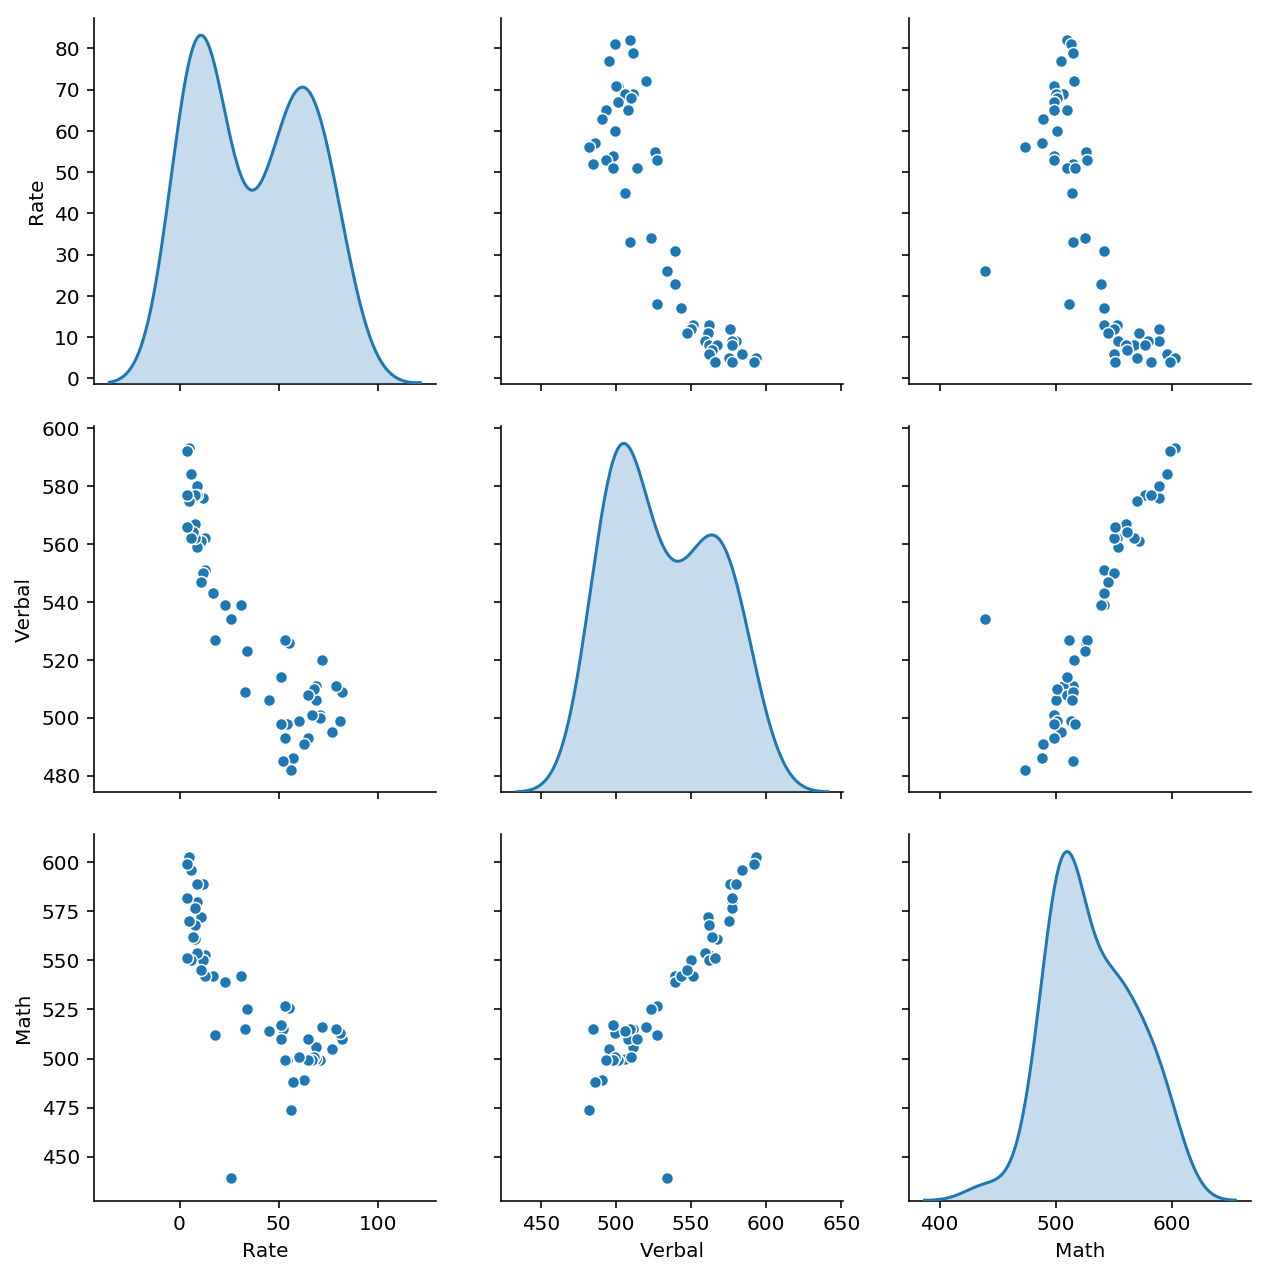

/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


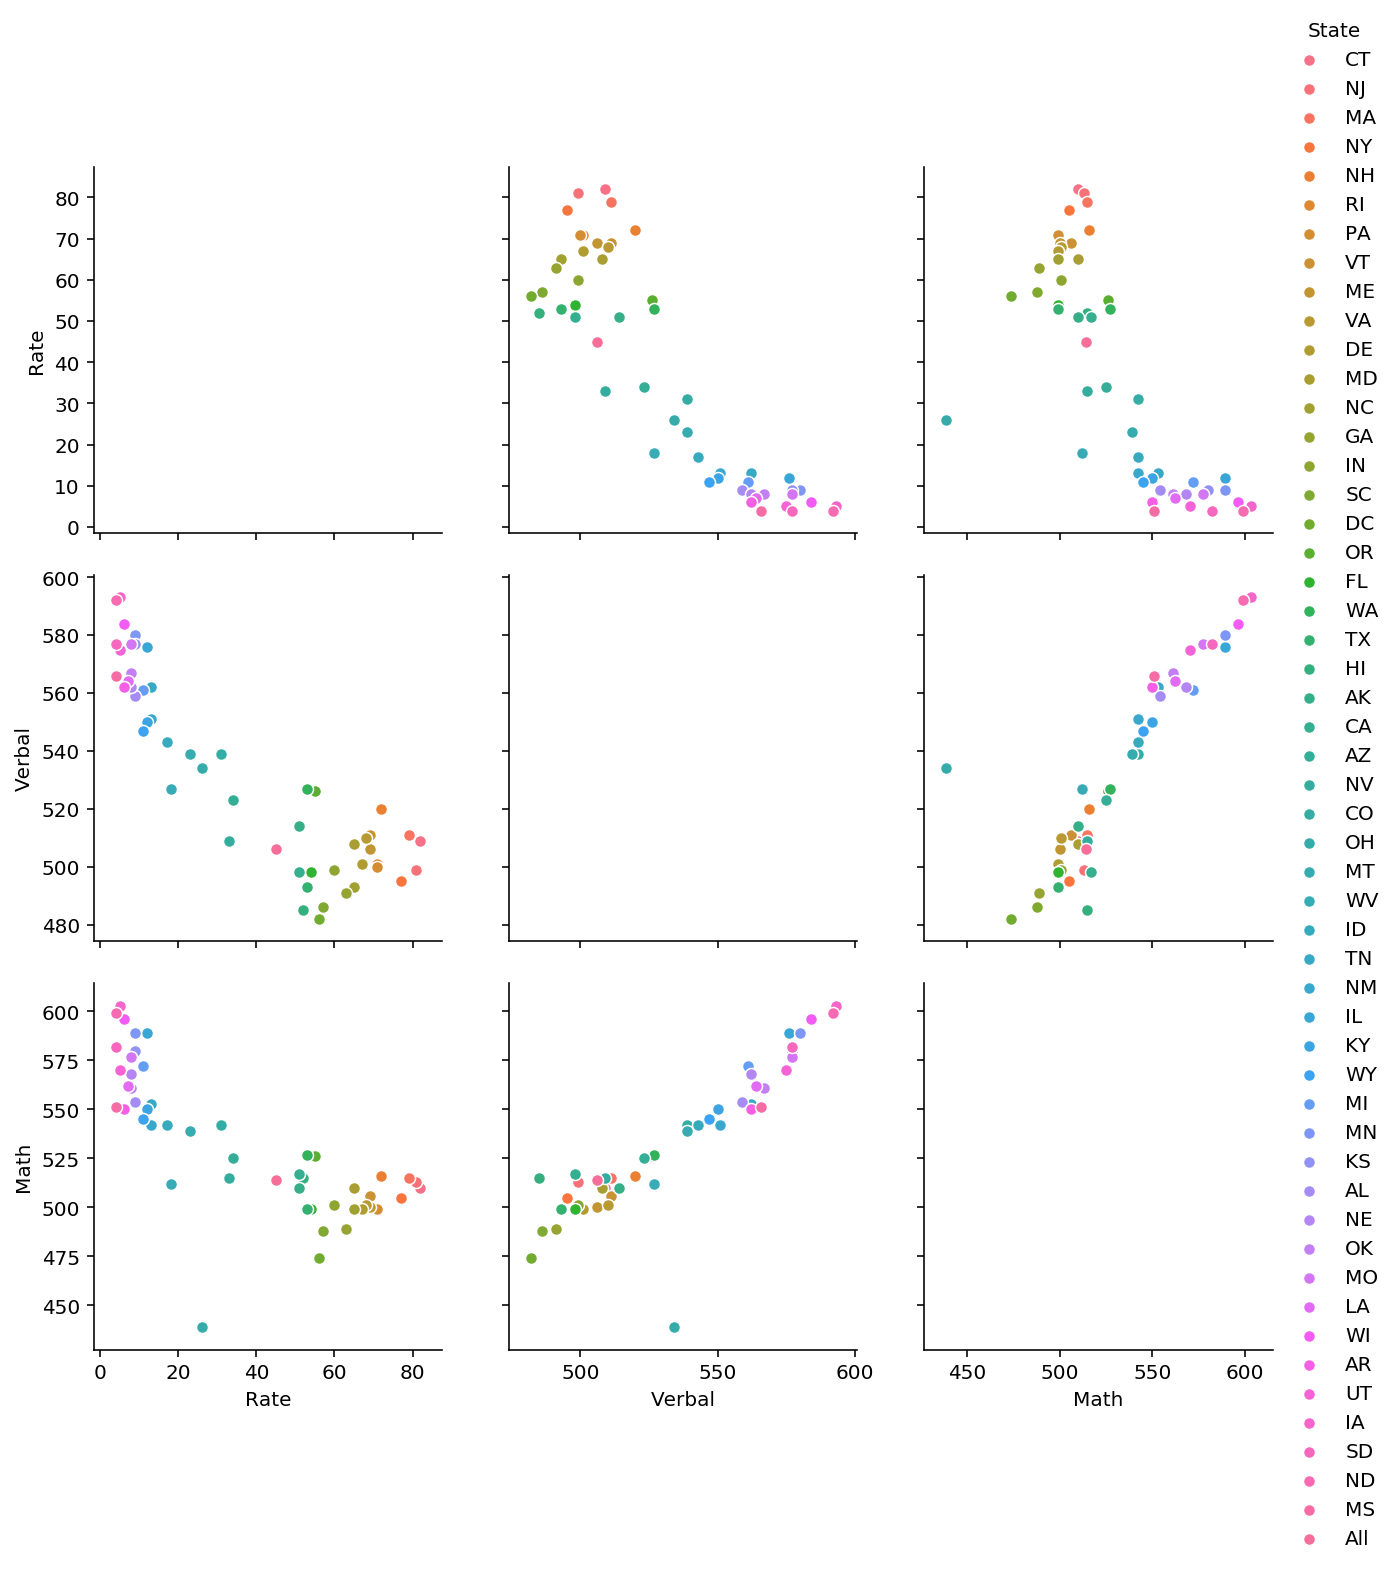

In [8]:
# The pairs plot builds on two basic figures, the histogram and the scatter plot. 
# Histograms on the diagonal allows us to see the distribution of a single variable.
# Scatterplots show the relationship between two variable pairs.
# i felt that histogram for the diagonal grpahs doesnt really tell us anything so i changed it to a desity plot
sns.pairplot(data_SAT, height=3, dropna=True, diag_kind ='kde')
plt.show()
sns.pairplot(data_SAT, height=3, dropna=True, diag_kind ='kde', hue='State')
plt.show()

<font color='red'> Your can further eloborate your interpretation. Did you find any correaltion between the variable? Its good to discuss about the correlation of the variables as well inaddition to your discription about the graph. Did you spot any outliers? It would be better if your could add titles to graphs

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

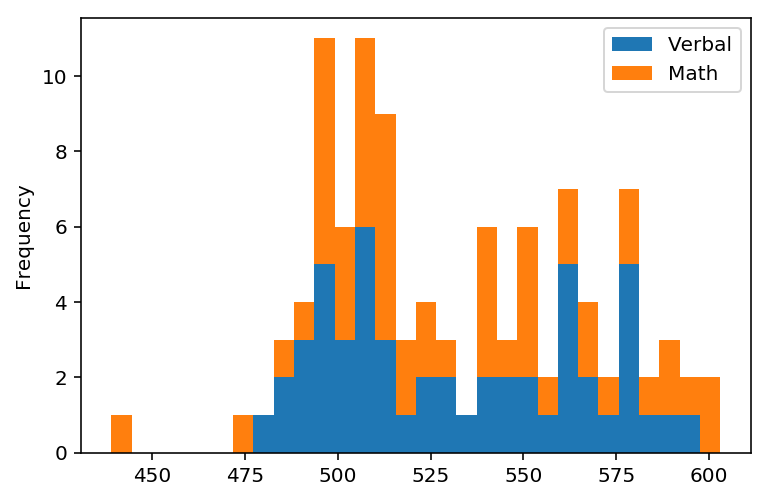

In [9]:
data_SAT[['Verbal', 'Math']].plot.hist(stacked=True, bins=30)

<font color='red'> The graph size is small you can increase the size. You can try using stacked bar plot instead of hist plot to get better visualization of the data. And add title to graph

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

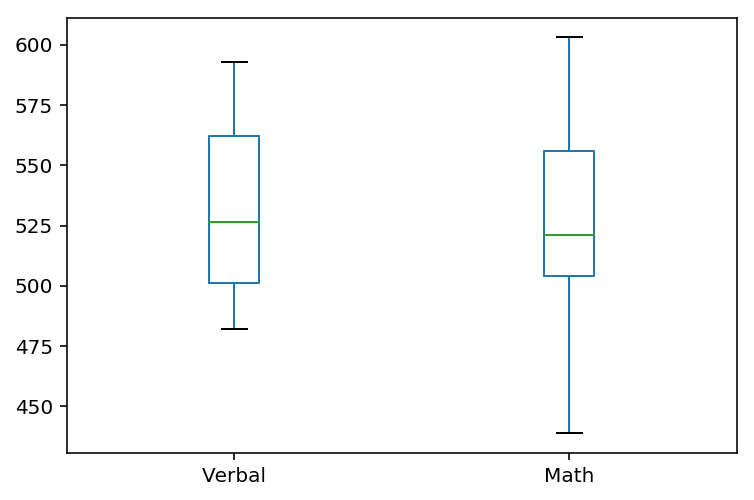

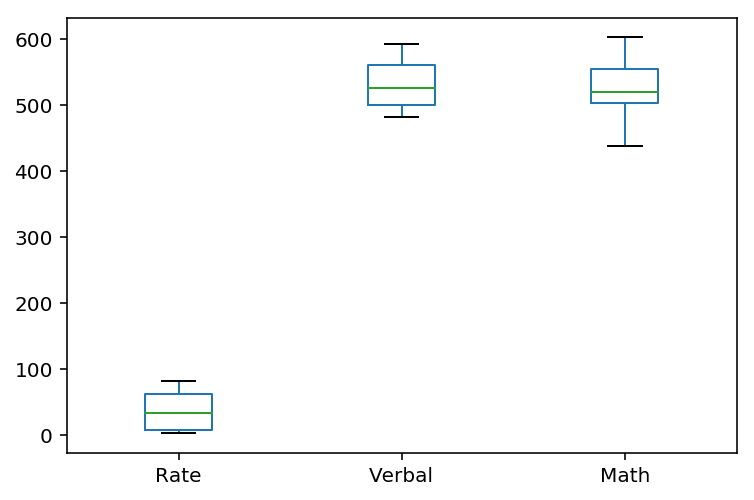

In [10]:
data_SAT[['Verbal', 'Math']].plot.box()
plt.show()
data_SAT.plot.box()
plt.show()

# if we boxplot the Rate with Math and Verbal, the box plots becomes very condensed as 
# the distribution in Rate is at a significantly lower number range than for Math or Verbal

<font color='red'> You can use seaborn to get nice plots instead matplotlib. Also, add title and make the graph bit larger

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [11]:
# we can normalize the variable so that all variables starts on the same "starting-line".
data_SAT['Math'].values

array([510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499,
       489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515,
       542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580,
       554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514])

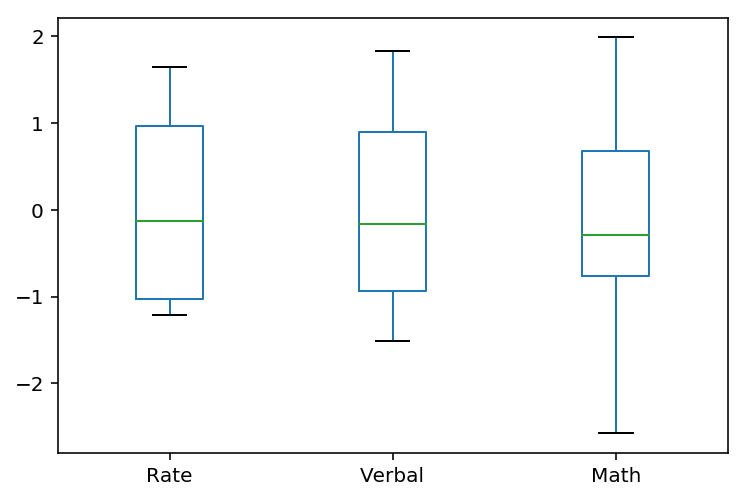

In [12]:
def standardize(category, data_set):
    standard = (data_set[category].values - np.mean(data_set[category])) / data_set[category].std()
    return pd.DataFrame(standard)

s_math = standardize('Math', data_SAT) 
s_verbal = standardize('Verbal', data_SAT)
s_rate = standardize('Rate', data_SAT)
df_standard = s_rate
df_standard['Verbal'] = s_verbal
df_standard['Math'] = s_math
df_standard.columns = ['Rate', 'Verbal', 'Math']
df_standard.plot.box()
plt.show()

<font color='red'> You can use seaborn to get nice plots instead matplotlib. Also, add title and make the graph bit larger

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [13]:
states_gavg = data_SAT[data_SAT['Verbal'] > data_SAT['Verbal'].mean()][['State']]
states_gavg['State'].describe()
#data_SAT['State'].describe()

# there are 24 states that are above average across states
# Since about half of the states are above general avg, the distribution of Verbal scores are approximately centered around the mean verbal score
# The distribution for state in relation to avg verbal scores across the states may be bell shaped and symmetrical

count     24
unique    24
top       ND
freq       1
Name: State, dtype: object

<font color='red'> Correct

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [14]:
states_gmed = data_SAT[data_SAT['Verbal'] > data_SAT['Verbal'].median()][['State']]
states_gmed['State'].describe()

# There are 26 states that are above median across states
# This backs up the hypothesis that the distribution of 'State' vs 'Verbal' is largely symmertrical, the mean is approximately the median

count     26
unique    26
top       IA
freq       1
Name: State, dtype: object

 <font color='red'> Both mean and median have 24 states above. Again, this is not a skewed distribution.
    
There is one data ``ALL`` which is not the state is present in the data. You have missed to notice it. Thats why you are facing this difference in the score. You have to keep it in mind for furture, you have do rigorous investigation is necessary when loading and cleaning data.<br> 

    
`Its a good practise if you could aline your write up in more readable way(some parts are hidding inside the cell, so difficult to read`

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [15]:
verbal_math = data_SAT['Verbal'] - data_SAT['Math']
verbal_math = pd.DataFrame(verbal_math)
verbal_math.columns = ['Verbal - Math']
#verbal_math
new_data_SAT = data_SAT.join(verbal_math)
new_data_SAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
State            52 non-null object
Rate             52 non-null int64
Verbal           52 non-null int64
Math             52 non-null int64
Verbal - Math    52 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [30]:
new_data_SAT.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


<font color='red'> Correct

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [16]:
# if verbal is greater than math, the difference will be positive and greatest difference will produce largest positive number
df1 = new_data_SAT.sort_values(by='Verbal - Math', ascending=False)
df1 = df1.head(10)

# if math is greater than verbal, the difference will be negative and greatest difference will produce most largest negative number
df2 = new_data_SAT.sort_values(by='Verbal - Math', ascending=True)
df2 = df2.head(10)

print("Greatest gap between 'Verbal' and 'Math'")
print(df1[['State']].head(3))
print('-'*50)
print("Greatest gap between 'Math' and 'Verbal'")
print(df2[['State']].head(3))

Greatest gap between 'Verbal' and 'Math'
   State
27    OH
50    MS
29    WV
--------------------------------------------------
Greatest gap between 'Math' and 'Verbal'
   State
21    HI
23    CA
1     NJ


<font color='red'> Correct

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [17]:
new_data_SAT.corr()
# The correlation matrix is a table showing correlation coefficients between sets of variables. 
# Each column in the table is correlated with each of the other columns in the table. This allows you to see which pairs have the highest correlation.
# with 1 being the highest correlation and -1 having the highest negative correlation and 0 having no correlation
# From our correlation matrix, it seems that the Verbal/Rate and Math/Rate pairs have very high correlation with each other ~0.89 and ~0.77 respectively
# However we have to note the correlation and causation of the pairs as the correlation may not give us useful infomation in the end

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


<font color='red'> Correct. You can break down the comments and write it within the cell, so that it is easy to read. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [18]:
new_data_SAT.describe()
# count row gives us the number of observations/total number of rows for that column
# mean row gives us the average value of the column the value can be found under
# std row gives us the standard deviation of the column the value can be found under
# min row gives us the smallest value in that particular column
# 25% row gives us the value that represents the 25th percentile value in the column it is under
# 50% row gives us the median value of the column and also represents the 50th percentile value in the column it is under
# 75% row gives us the value that represents the 75th percentile value in the column it is under
# max row gives us the largest value in that particular column

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<font color='red'> Correct

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [19]:
covar = new_data_SAT.cov()
print(covar)
# Correlation is a function of the covariance. 
# But correlation values are standardized whereas covariance values are not.

                     Rate       Verbal         Math  Verbal - Math
Rate           745.387632  -804.355958  -760.803922     -43.552036
Verbal        -804.355958  1104.646682  1077.147059      27.499623
Math          -760.803922  1077.147059  1297.078431    -219.931373
Verbal - Math  -43.552036    27.499623  -219.931373     247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [20]:
# Percentage of those in an age group who used [drug] in the past 12 months
# [Drug]-frequency Median number of times a user in an age group used [drug] in the past 12 months
# The data will need some cleaning to make more sense, but we should understand the column data first
# There are missing values in the form of '-' we have to do smth about those (either drop the rows if theres too many '-' or replace '-' with np.nan)
# Missing values usually affect the distribution values (mean, median, min, max, std) of the column which in some cases may affect our EDA significantly 
# Data types are not sync-ed because of '-', sycing column data types will be first prioity

drugs = pd.read_csv('drug-use-by-age.csv')
drugs.replace('-', np.nan, inplace=True)
for col in drugs.columns:
    try:
        drugs[[col]] = drugs[[col]].astype(float)
    except:
        drugs[[col]] = drugs[[col]]
drugs


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792.0,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956.0,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058.0,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038.0,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469.0,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223.0,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271.0,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354.0,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

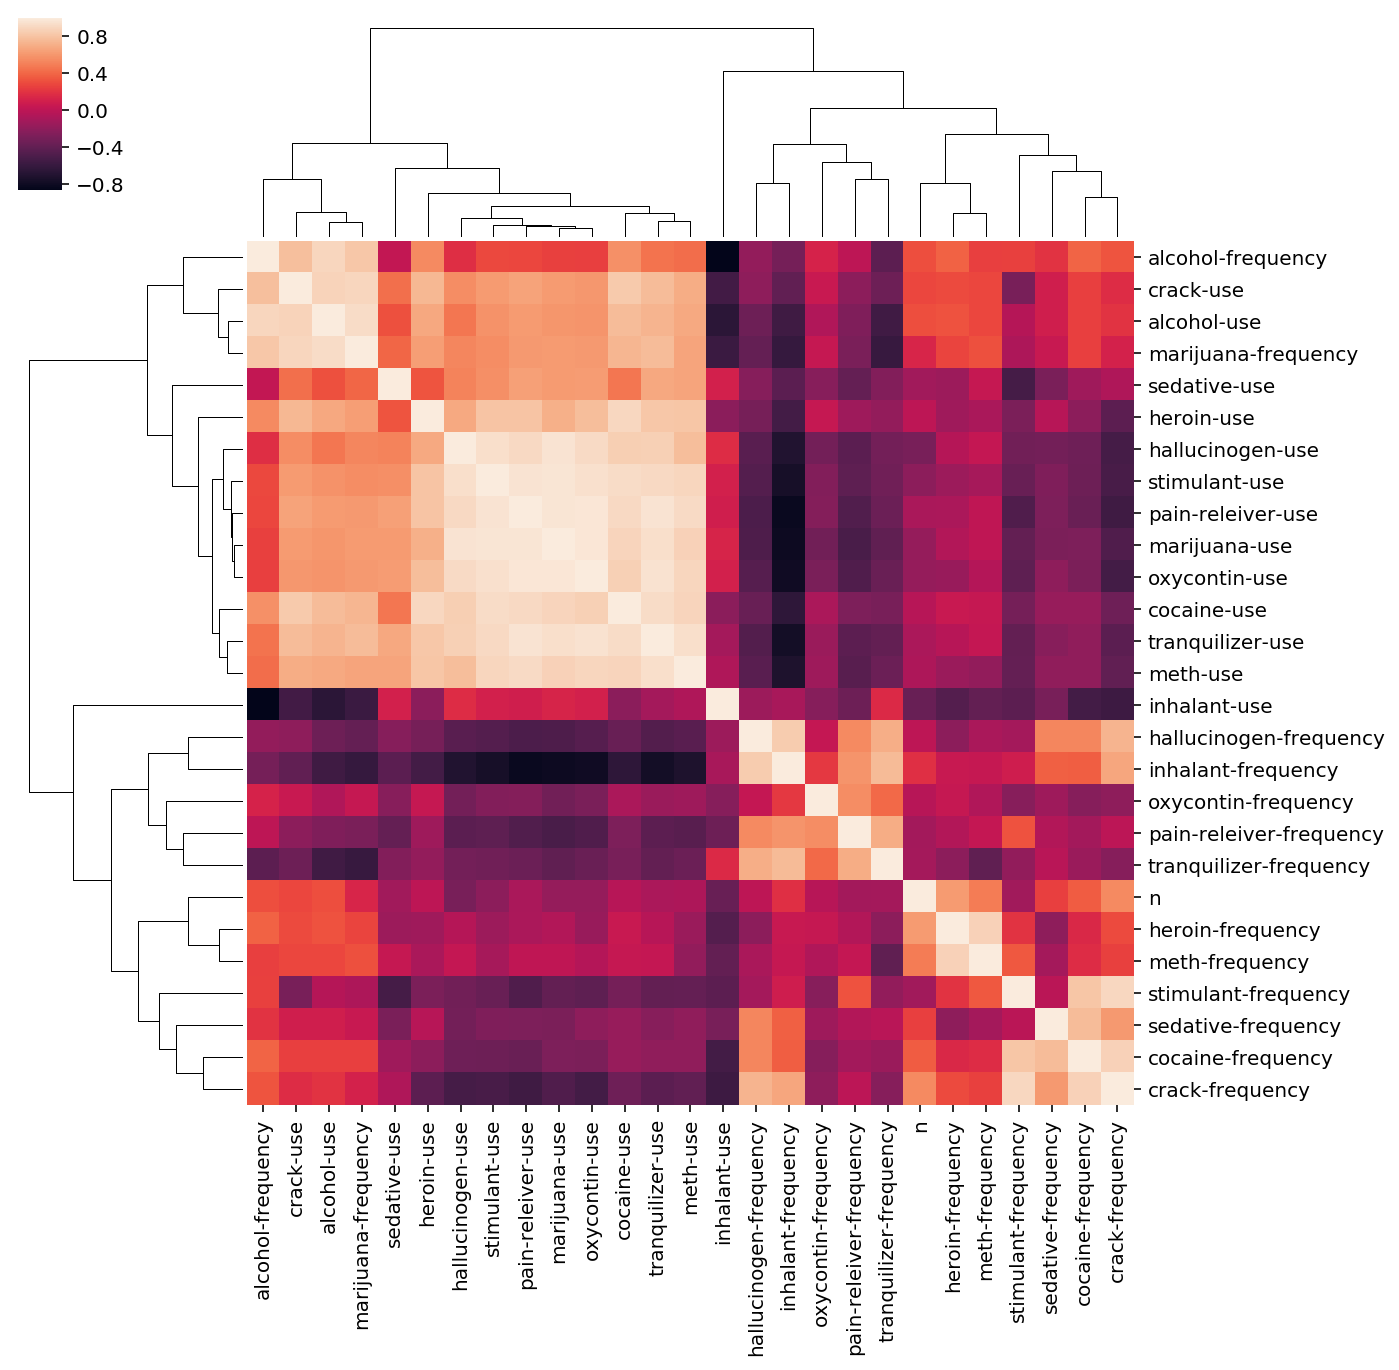

In [21]:
# Some of the columns are subsets of the other columns, we maybe able to combine them and it may give us a better idea of the dataset.
# A good idea can be to separate the 'use' and 'frequency' columns into 2 subsets of the main dataframe and try to derive relationships 
# We can group the age groups into ranges
sns.clustermap(drugs.corr())
# This dataset give us the frequency and usage of the different drugs.  
# From the clustermap below, theres indication that drug use and drug frequency have an inverse relationship, more of one is less of the other, we can look into this
# For example, marijuana use has a strong correlation to cocaine, oxycontin, hallucinogen, pain-releiver and stimulant use.
# Also from clustermap, theres indication that people that use a group of drugs also use other drugs as well. To have more accuracy between drug use relationships, we can do some stats modelling
# From a high level perspective, it is safe to assume that people that overuse drugs usually are on multiple types of abuse instead of "specialising" in one drug overuse.

<font color='red'> The discription you have given is difficult to read. Please use mark down sessions for long answers. 

Some of the columns are subsets of the other columns, we maybe able to combine them and it may give us a better idea of the dataset.
A good idea can be to separate the 'use' and 'frequency' columns into 2 subsets of the main dataframe and try to derive relationships 
We can group the age groups into ranges

This dataset give us the frequency and usage of the different drugs.  
From the clustermap below, theres indication that drug use and drug frequency have an inverse relationship, more of one is less of the other, we can look into this
For example, marijuana use has a strong correlation to cocaine, oxycontin, hallucinogen, pain-releiver and stimulant use.
Also from clustermap, theres indication that people that use a group of drugs also use other drugs as well. To have more accuracy between drug use relationships, we can do some stats modelling
From a high level perspective, it is safe to assume that people that overuse drugs usually are on multiple types of abuse instead of "specialising" in one drug overuse.

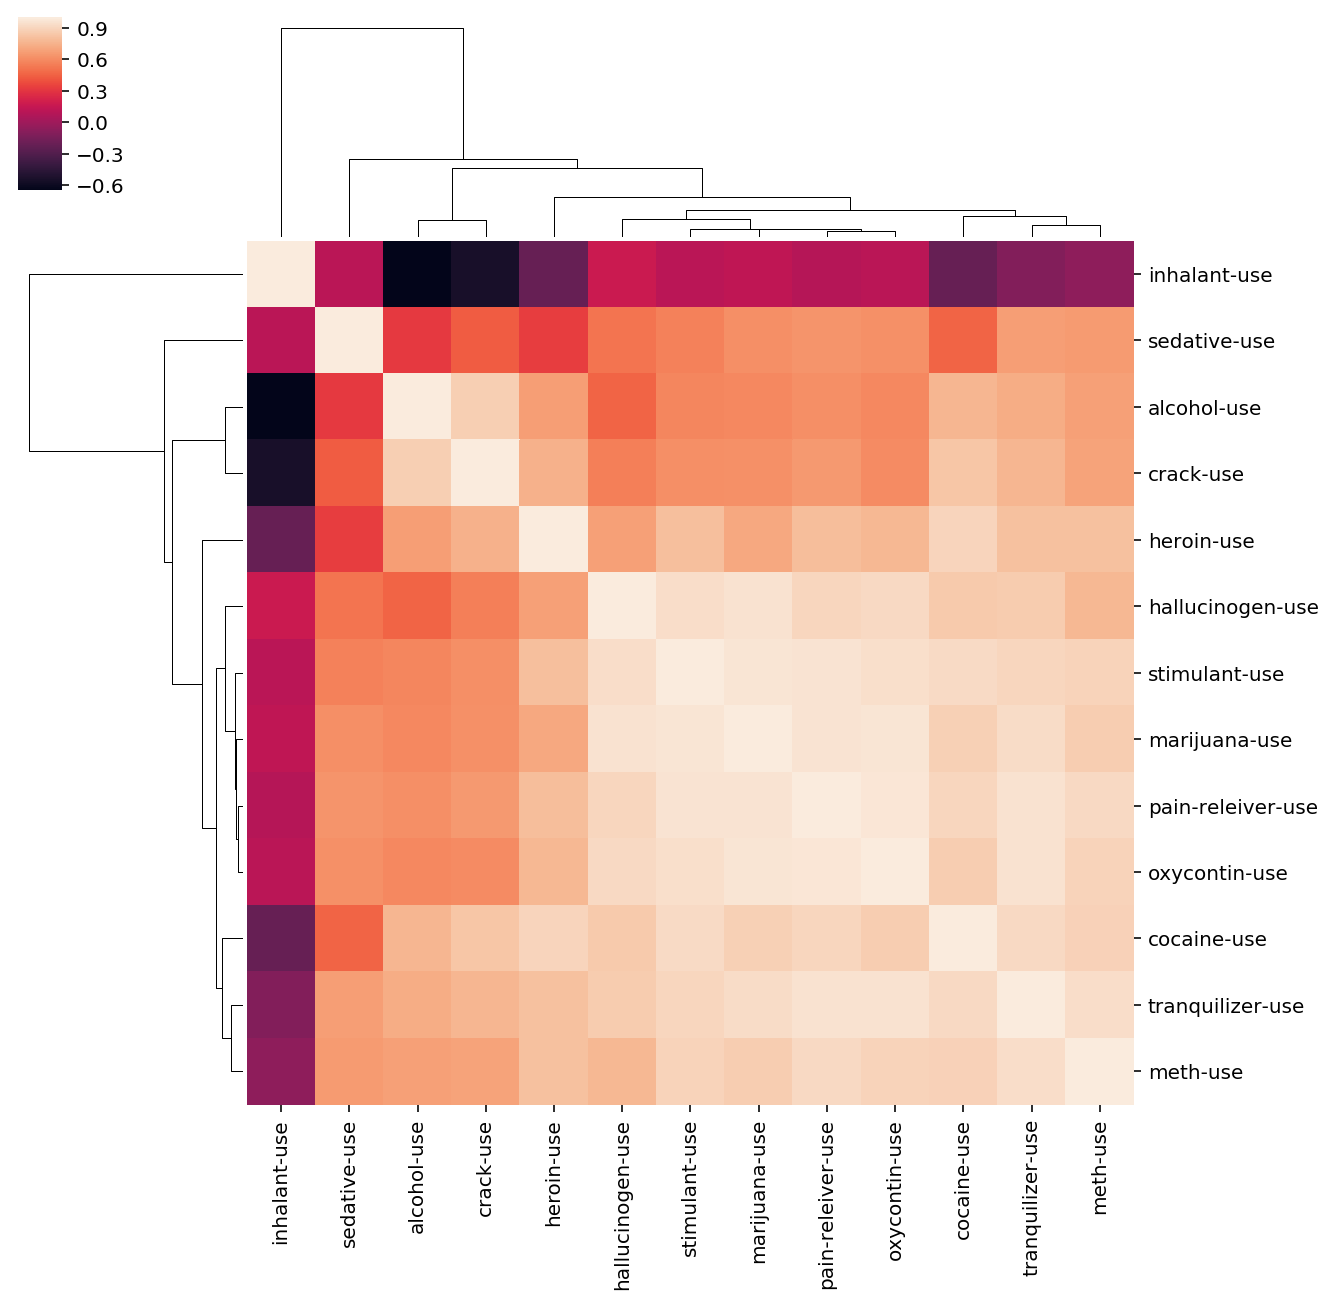

In [22]:
category = list(drugs.columns)
new_list1 = []
for cat in category:
    if 'frequency' in cat:
        new_list1.append(cat)
drug_usage = drugs.drop(new_list1, axis=1)
drug_usage = drug_usage.drop('n', axis=1)
sns.clustermap(drug_usage.corr())
# From this clustermap from drug use data, inhalant use can be deemed to be unrelated to other drug use from the distinct negative correlation with other drugs.
# Another observation is the strong relationship between hallucinogen, stimulant, marijuana, pain-releiver and oxycontin use. This can be further examined

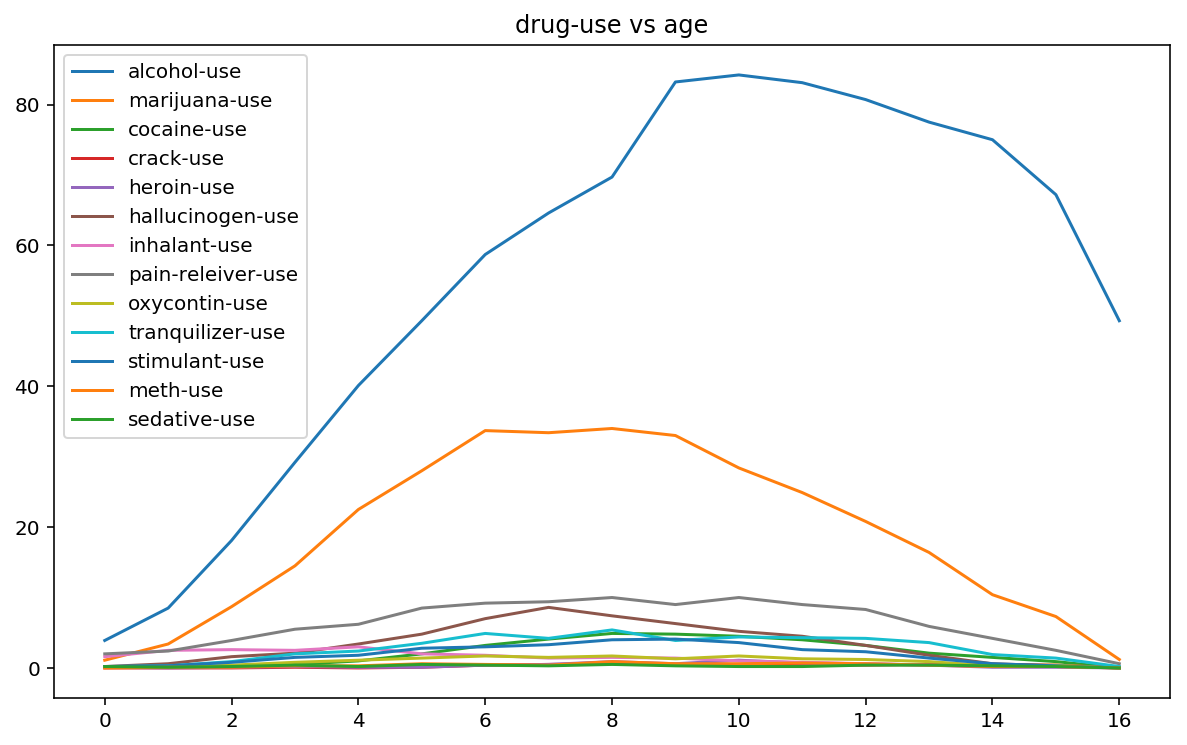

In [23]:
drug_usage.plot(figsize=(10,6), title="drug-use vs age", )
# most popular drugs seems to be alcohol and marijuana which see it being most popular at the age-range of 20-23(alcohol) and 17-23(marijuana)

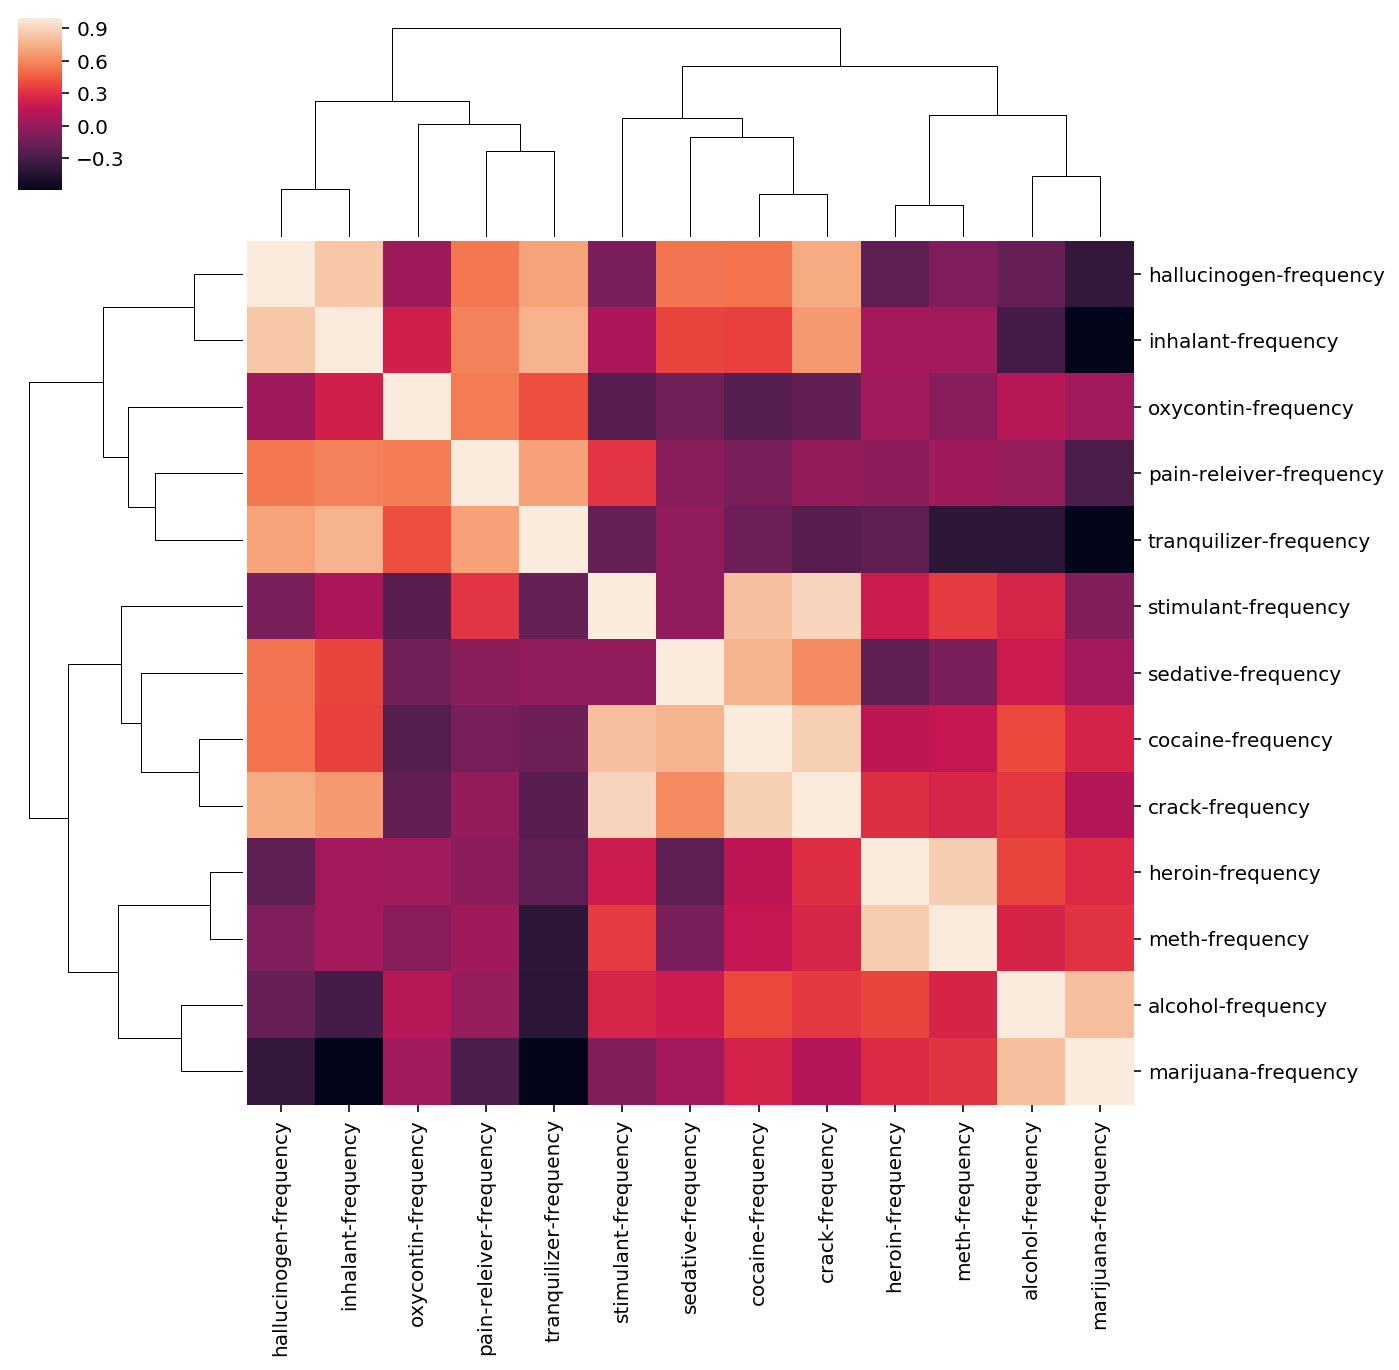

In [24]:
category = list(drugs.columns)
new_list2 = []
for cat in category:
    if 'use' in cat:
        new_list2.append(cat)
drug_frequency = drugs.drop(new_list2, axis=1)
drug_frequency = drug_frequency.drop('n', axis=1)
sns.clustermap(drug_frequency.corr())
# However if we were to look at the frequency data, theres not much relationship between the the difference types of drugs and their use frequency.

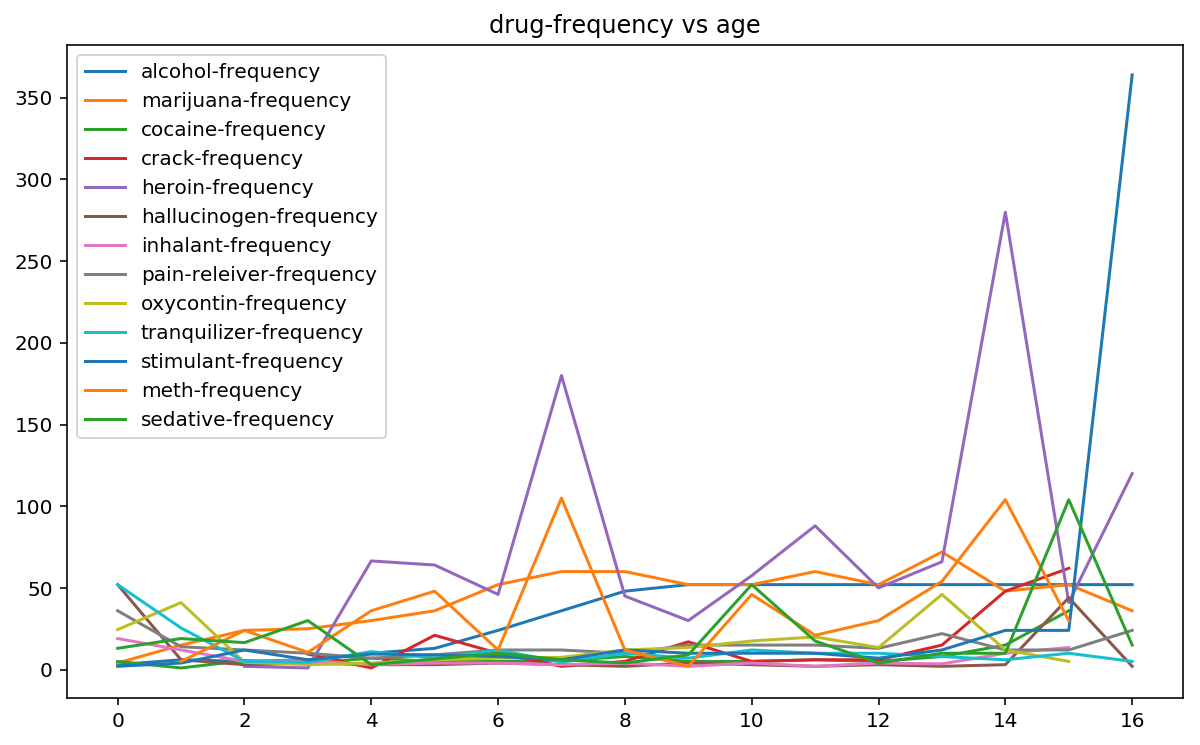

In [25]:
drug_frequency.plot(figsize=(10,6), title="drug-frequency vs age", )
# From drug-frequency data, while relatively messy, heroin and meth-frequencies have sharp significant peaks in the age range of 18-20.
# We can investigate further about the drug usage vs drug frequency of heroin and meth in youths of age range 16-25 

<font color='red'> Please use mark down sessions for long answers: The discription you have given is difficult to read. And include title to the graphs.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [26]:
# Is there a correlation between heroin and meth in youths of age range 16-25?
# Deliverables will be some recommendations on the usefulness of the methodology of obtaining the results of the hypothesis (Can we applied to obtain other relational data)
# Some visualisations on the relationship
# How the data looks like after some EDA for the purpose of testing the question

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value enc

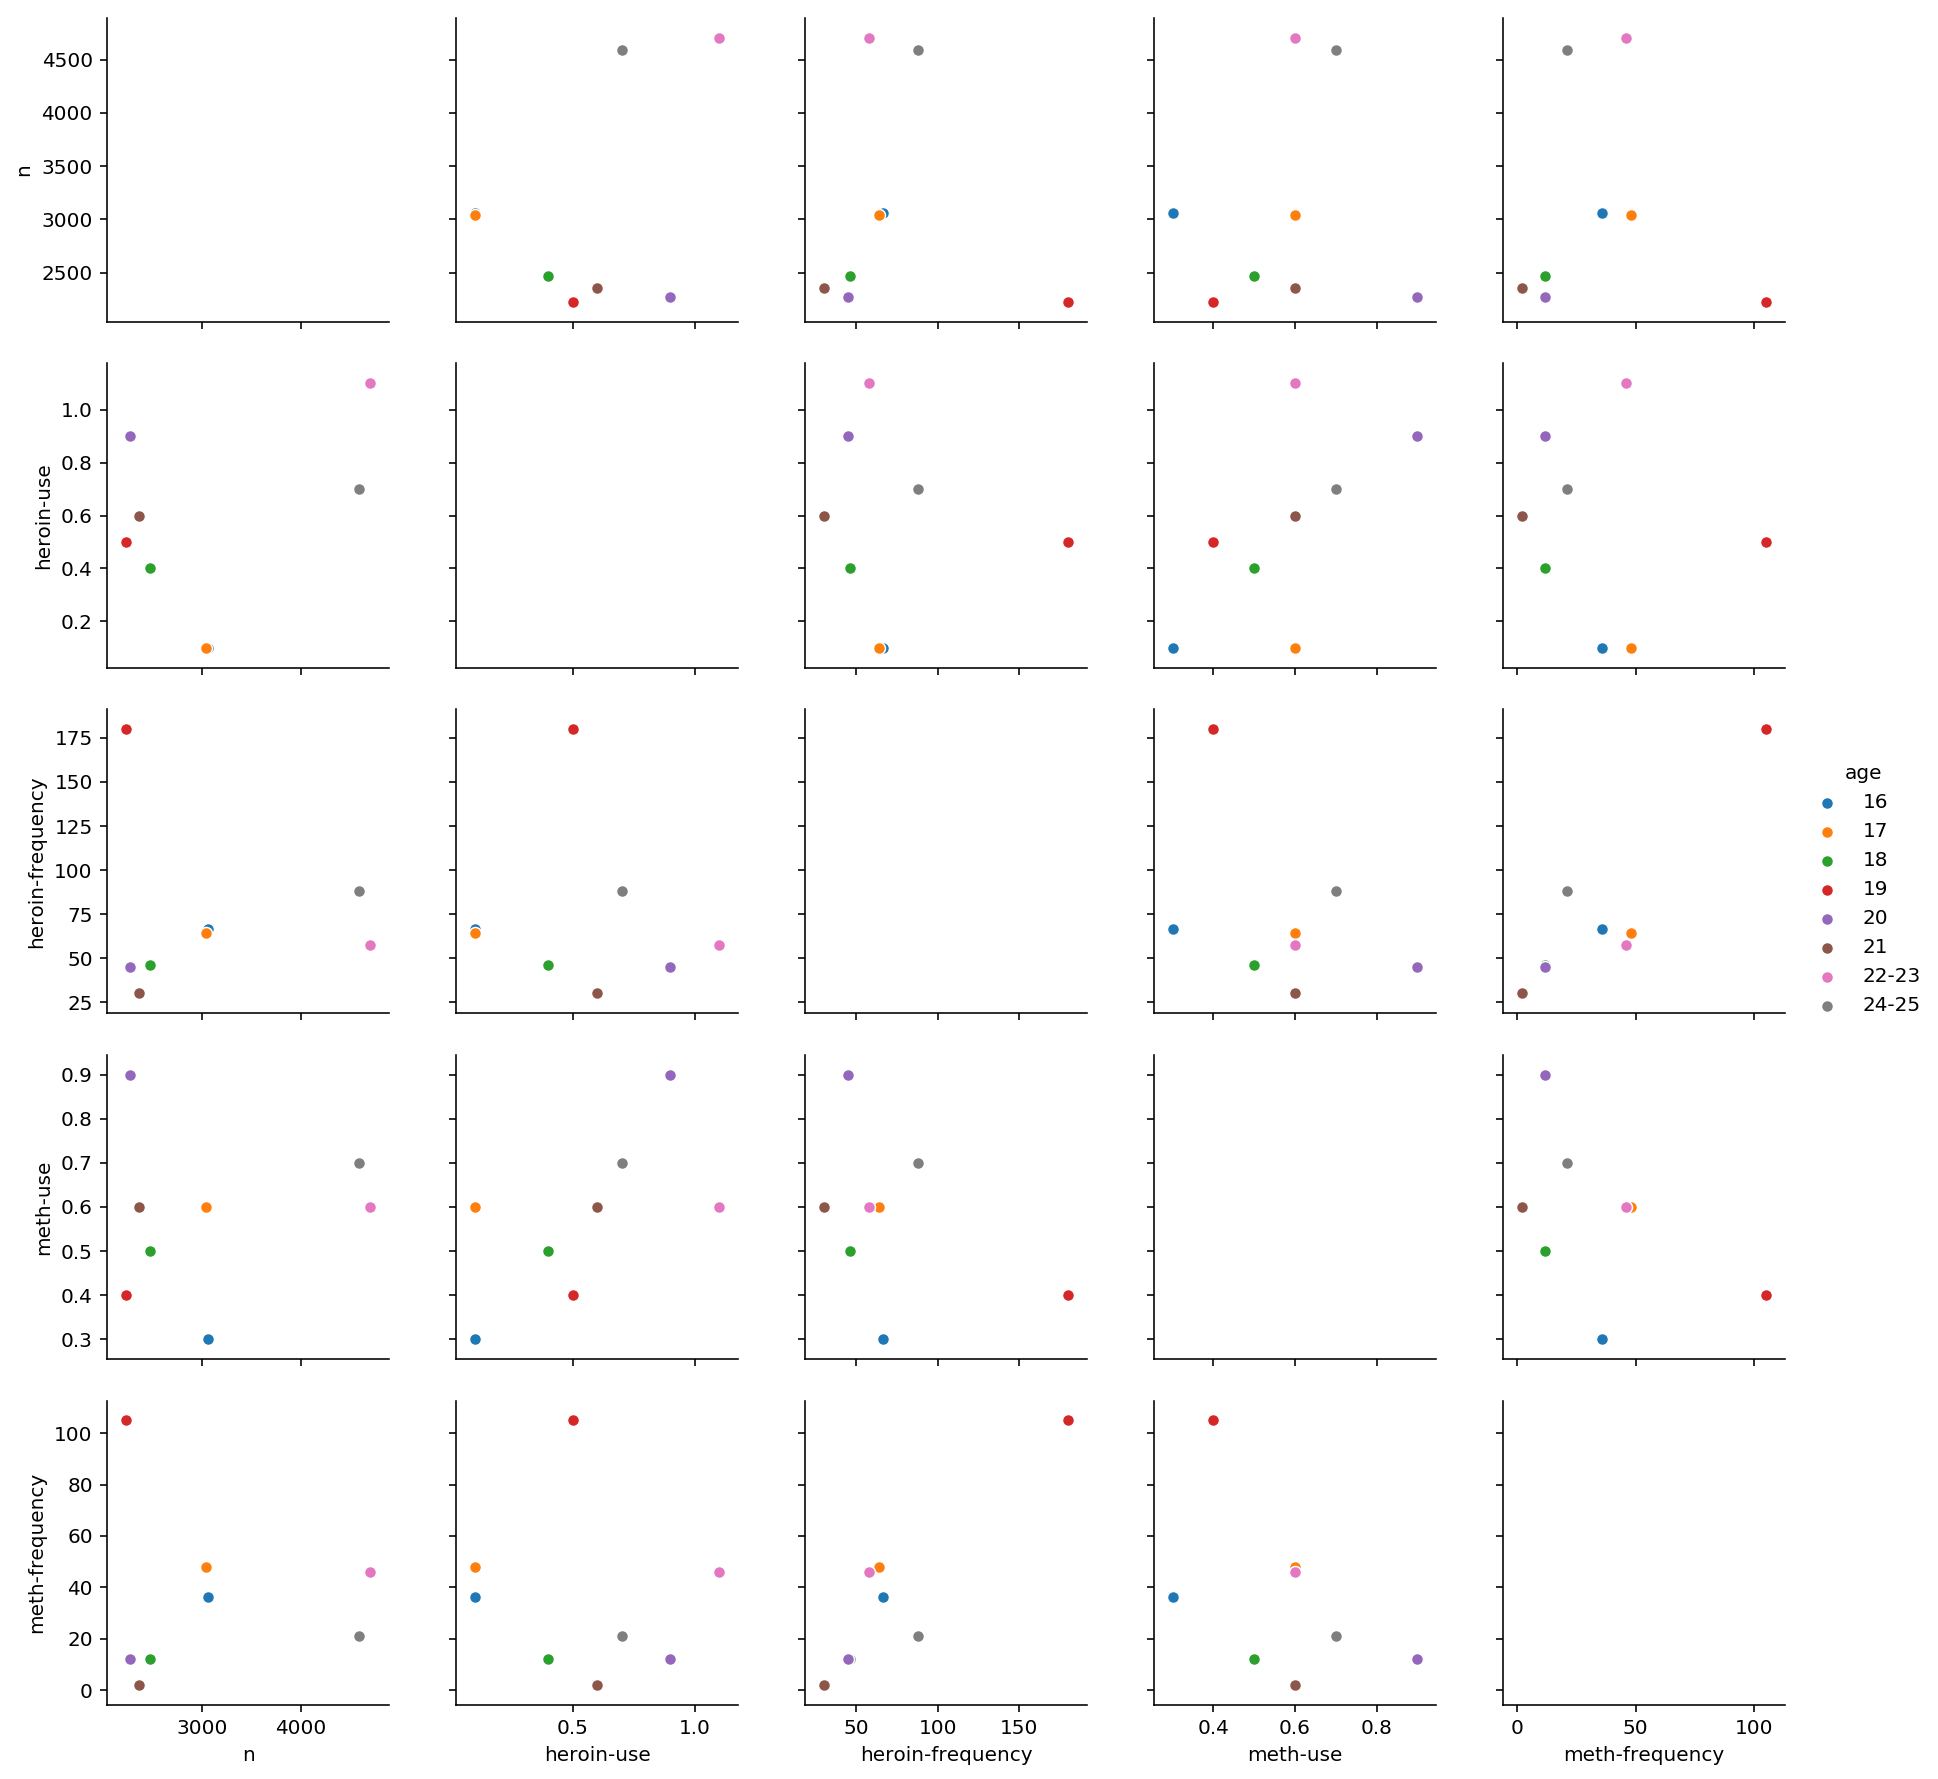

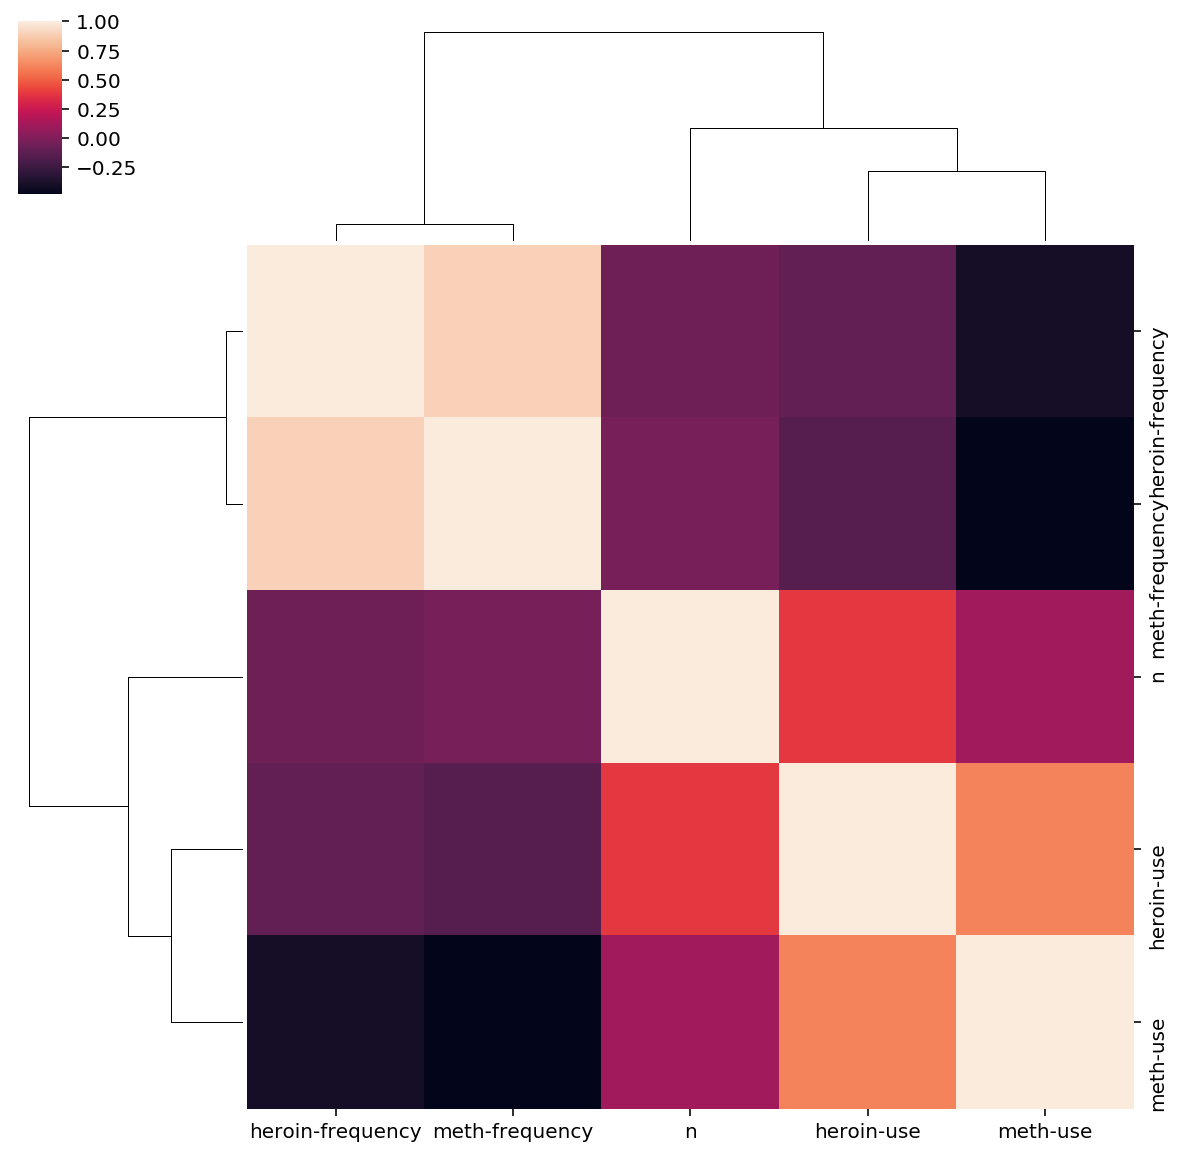

In [27]:
# Code
# filter just heroin and meth drug use for age 16-25
druggie = drugs[['age', 'n', 'heroin-use', 'heroin-frequency', 'meth-use', 'meth-frequency']][4:12]
# get the correlation matrix of the dataframe to get a feel of the correlation
d_c = druggie.corr()
#plot pairplot/clustermap with seaborn to look nicer
sns.pairplot(druggie, hue='age')
plt.show()
sns.clustermap(d_c)
plt.show()

# From pairplot data the scatterplot for meth and heroin frequency shows that youths that are 19 are not the age group that takes the most, they takes them more frequently.
# Evidence being the red dot which represents 19yrs olds are either very high up or are on the left of the graphs
# From clustermap, theres evidence that meth use is inversely related to meth and heroin frequency. Therefore it mayb the case that meth and heroin are not repeatedly used.
# Answer to the question:
# There is a general inverse relationship between between use and frequency of meth and heroin, regardless of between themselves (meth-meth) or each-other(meth-heroin)
# People that are 19 are more susceptible to drug use but not to the point of overuse. This may be due to exploration and curosity. Preventive measure can be drug education
# Recommendations for further exploration will be to tally the avaliable dataset with other data from hospitals and morgues to more accurately correlate drug-addiction/overuse
# so as to craft effective preventive measures to be set in-place.
# EDA can only give us an idea of the relationship, but more precise analysis can be done using stats testing

**Report**



...

<font color='red'> This part doesnot answer the question. You need to form hypotheses and justify them with solid statistical testing. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [28]:
# Numerically, outliers are values that are larger than the sum of the mean and (3*standrd deviation)


mean = np.mean(rate_data['Rate'])
std_dev = np.std(rate_data['Rate'])
outies = mean + (std_dev * 1.5)
outies

NameError: name 'rate_data' is not defined

In [ ]:
rate_data

In [ ]:
outliers = rate_data[rate_data['Rate'] > outies]
outliers

In [ ]:
rate_data[rate_data['Rate'] < outies]

In [ ]:
rate_data_2 = rate_data[rate_data['Rate'].isin(outliers['Rate']) == False]

In [ ]:
print(rate_data.describe())
print('-'*50)
print(rate_data_2.describe())
# the values for count mean std 50% 75& and max are lower for dataframe with outliers removed.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [ ]:
print(data_SAT.corr(method='spearman'))
print('-'*50)
print(data_SAT.corr())
# spearman correlated pair values usually have higher values than pearson correlated pair values

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [ ]:
rate = list(data_SAT['Rate'])
data_SAT['percentiles'] = [stats.percentileofscore(rate, i, 'rank') for i in rate]
data_SAT

In [ ]:
data_SAT.describe()

In [ ]:
data_SAT[data_SAT['State'] == 'CA'][['State', 'percentiles']]

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [ ]:
# 1. We can identify outliers since they will be greater than (75% percentile value - 25% percentile value) * 1.5
drugs['meth-use'].plot(kind='hist')

In [ ]:
meth_head = list(drugs['meth-use'])
drugs['meth-percentile'] = [stats.percentileofscore(meth_head, i, 'rank') for i in meth_head]
drugs

In [ ]:
drugs['meth-use'].plot(kind='hist')
plt.show()
drugs['meth-percentile'].plot(kind='hist')
plt.show()

In [ ]:
# Visually, the y-axis(frequency) has no change. the shape of the graph is similar along the x-axis